In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io

In [12]:
def normalize(data):
    data_norm = (data - np.mean(data)) / np.std(data)
    return data_norm

In [91]:
init_data = scipy.io.loadmat('/content/drive/My Drive/Prob3/Data1.mat')
data = init_data['X']
label = init_data['Y']

In [183]:
print(np.corrcoef(data_norm[:,2], label.T))

[[1.         0.54444692]
 [0.54444692 1.        ]]


In [181]:
X_mean = np.mean(data_norm)
Y_mean = np.mean(label)

num = 0
den = 0
for i in range(len(data_norm)):
    num += (data_norm[i] - X_mean)*(label[i] - Y_mean)
    den += (data_norm[i] - X_mean)**2
m = num / den
c = Y_mean - m * X_mean

(3,)


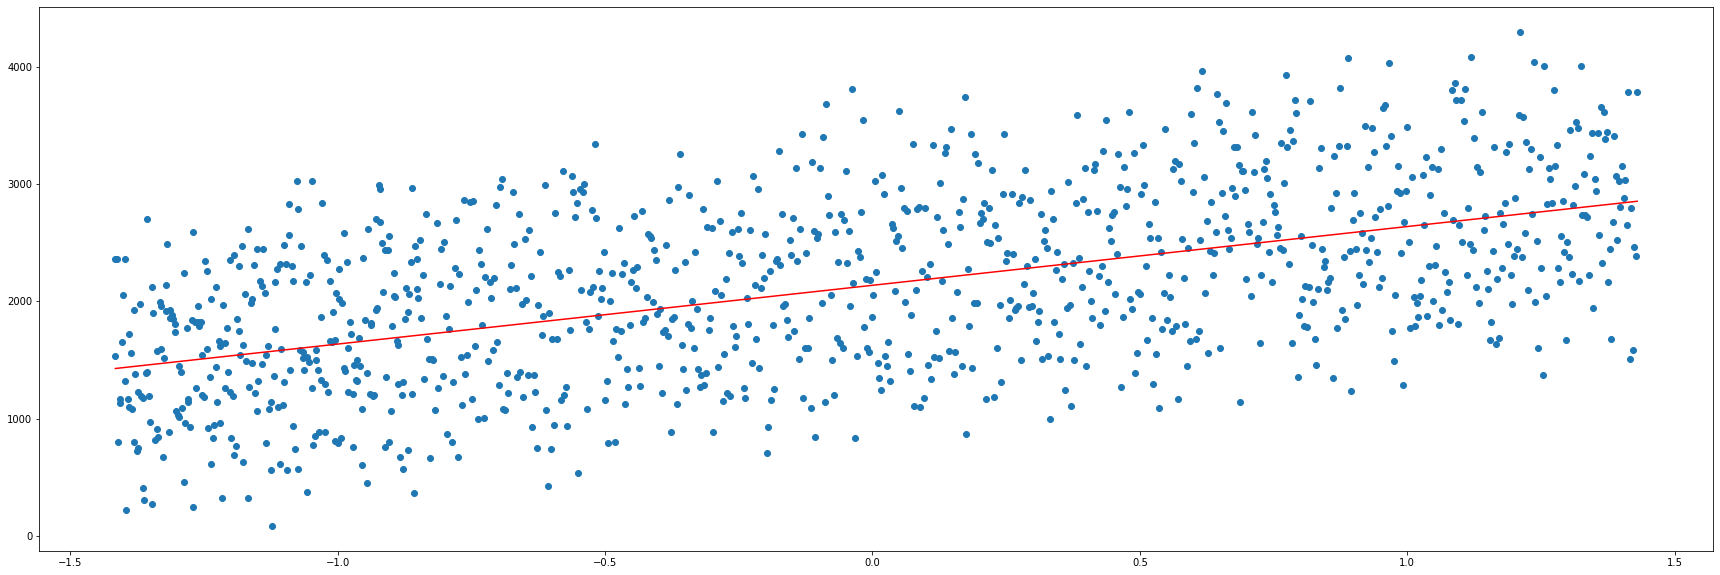

In [182]:
data_norm = normalize(data)
X = data_norm
Y = label
print(c.shape)
Y_pred = m * X + c
plt.figure(figsize=(30,10))
plt.scatter(X[:,2], Y) # actual
plt.plot([min(X[:,2]), max(X[:,2])], [min(Y_pred[:,2]), max(Y_pred[:,2])], color='red') # predicted
plt.show()

In [120]:
cost = 1/(X.shape[0]) * np.mean(np.square(Y_pred - Y))
print(cost)

411.64890882632267


No handles with labels found to put in legend.


Coefficients
[-268.90734343  409.34960853  500.67202143] [2137.66821164 2137.66821164 2137.66821164]


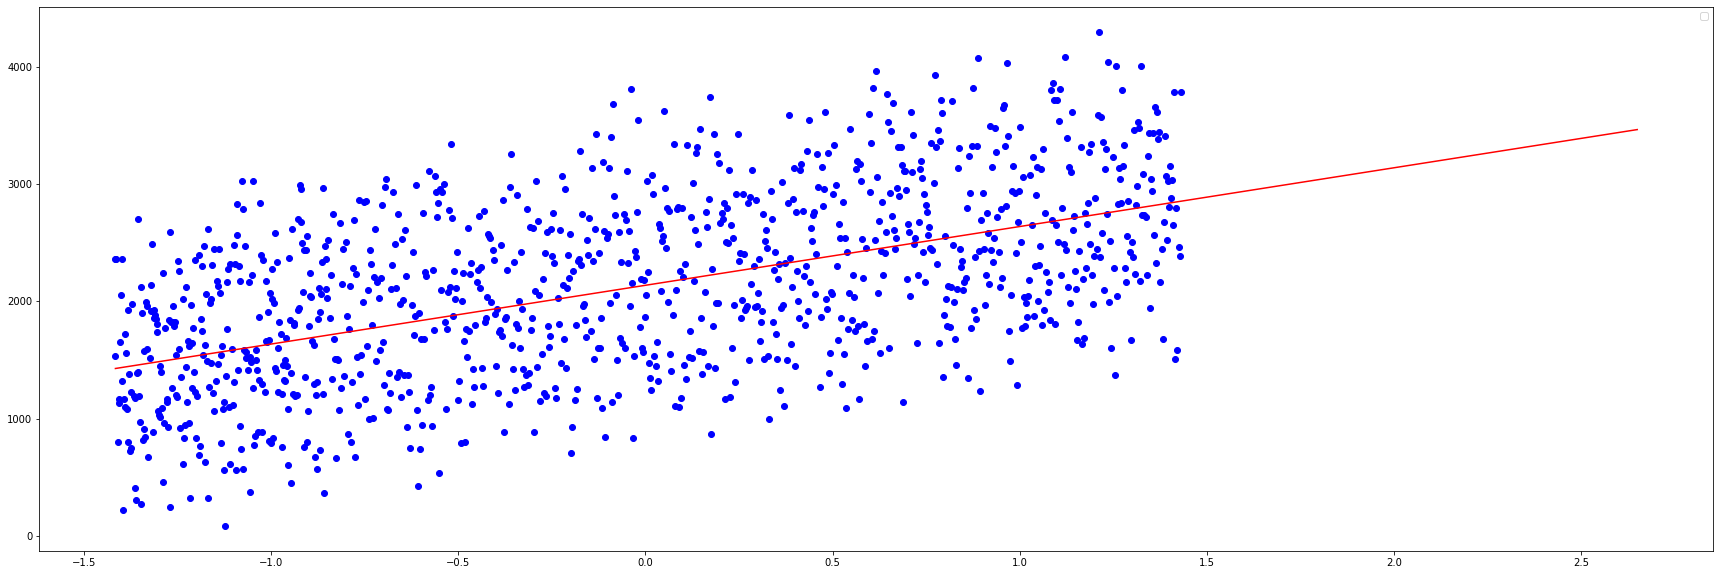

In [179]:
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)
 
# Total number of values
n = len(X)
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
    m = numer / denom
    c = mean_y - (m * mean_x)
 
# Printing coefficients
print("Coefficients")
print(m, c)
max_x = np.max(X)
min_x = np.min(X)
 
# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)

x = x.reshape(x.shape[0],-1)
m = m.reshape(m.shape[0],-1)

y = c + x * m.T
plt.figure(figsize=(30,10))

# Ploting Line
plt.plot(x, y[:,2], color = 'r')
# Ploting Scatter Points
plt.scatter(X[:,2], Y, color = 'b')

plt.legend()
plt.show()